# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

### Collecting Data

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | My family and I have flown ...
1,✅ Trip Verified | This has been by far the wo...
2,✅ Trip Verified | In Nov 2022 I booked and pa...
3,Not Verified | BA is not treating its premium ...
4,✅ Trip Verified | 24 hours before our departu...
5,✅ Trip Verified | We arrived at Heathrow at 0...
6,✅ Trip Verified | Original flight was cancell...
7,Not Verified | Airport check in was functiona...
8,✅ Trip Verified | Flight fine. In-line with c...
9,✅ Trip Verified | Came from Glasgow to London...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Cleaning The Dataset

In [5]:
#Remove irrelevant text

df = df.replace(regex=['✅ Trip Verified |'],value='')
df = df.replace(regex=['Not Verified |'],value='')
df.head(10)

,reviews
0,| My family and I have flown mostly on Britis...
1,| This has been by far the worst service I ha...
2,| In Nov 2022 I booked and paid for a return ...
3,| BA is not treating its premium economy passe...
4,| 24 hours before our departure on BA059 to C...
5,| We arrived at Heathrow at 0600 to find our ...
6,| Original flight was cancelled with no expla...
7,| Airport check in was functionary with littl...
8,| Flight fine. In-line with competitors. Plea...
9,| Came from Glasgow to London and took connec...


In [6]:
# Load the regular expression library
import re

# Remove punctuation
df['reviews'] = df['reviews'].map(lambda x: re.sub('[,\\.!?]', '', x))

# Convert the titles to lowercase
df['reviews'] = df['reviews'].map(lambda x: x.lower())

# Print out the first rows of papers
df['reviews'].head()

0    |  my family and i have flown mostly on britis...
1    |  this has been by far the worst service i ha...
2    |  in nov 2022 i booked and paid for a return ...
3    | ba is not treating its premium economy passe...
4    |  24 hours before our departure on ba059 to c...
Name: reviews, dtype: object

### Exploratory Data Analysis

In [7]:
import sys
print(sys.executable)

C:\Users\vikan\anaconda3\python.exe


In [8]:
!C:/Users/vikan/anaconda3/python -m pip install wordcloud

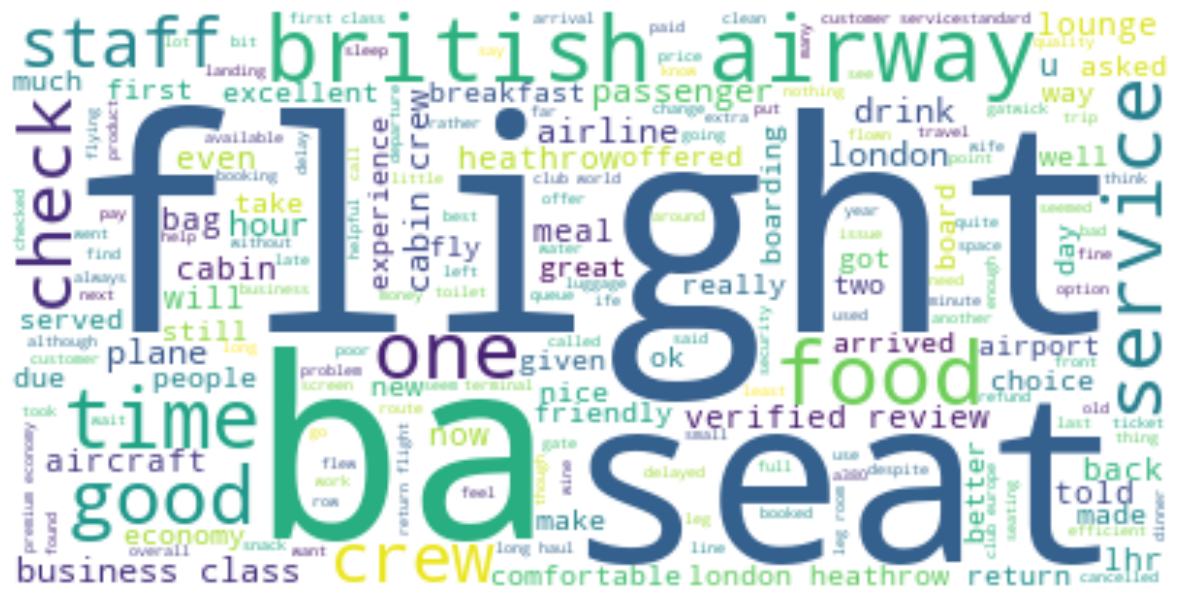

In [9]:
#Generating wordcloud

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

text = ",".join(i for i in df.reviews)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color="white", stopwords=stopwords, 
                      max_words=5000, contour_width=3, contour_color='steelblue').generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Sentiment Analysis using TextBlob

In [10]:
df['reviews'] = df['reviews'].astype('string')

In [11]:
!pip install -U textblob
from textblob import TextBlob

In [12]:
df['sentiment_polarity'] = df['reviews'].apply(lambda text: TextBlob(text).sentiment.polarity)
df['sentiment_subjectivity'] = df['reviews'].apply(lambda text: TextBlob(text).sentiment.subjectivity)
df.head()

,reviews,sentiment_polarity,sentiment_subjectivity
0,| my family and i have flown mostly on britis...,0.125269,0.463234
1,| this has been by far the worst service i ha...,-0.074519,0.601923
2,| in nov 2022 i booked and paid for a return ...,0.080073,0.522130
3,| ba is not treating its premium economy passe...,0.000000,0.000000
4,| 24 hours before our departure on ba059 to c...,-0.032217,0.440040


In [13]:
df.describe()

,sentiment_polarity,sentiment_subjectivity
count,3598.000000,3598.000000
mean,0.093087,0.489854
std,0.178449,0.109450
min,-0.766667,0.000000
25%,-0.018333,0.425000
50%,0.082240,0.489335
75%,0.202494,0.553610
max,0.800000,1.000000


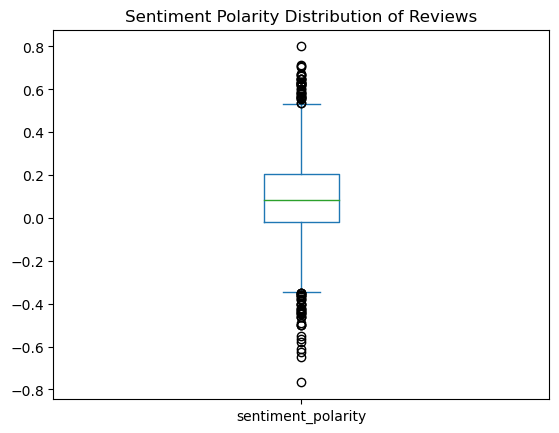

In [16]:
#Visualizing using box plot

df['sentiment_polarity'].plot(kind='box', title='Sentiment Polarity Distribution of Reviews')
plt.show()